In [1]:
import numpy as np
from ModelTest import *
import pandas as pd
from Utilities import obsFrac, getMidnightNoonIdx
from SSMTools import *
#from Utilities import ding

In [2]:
colors = 2*[c["color"] for c in plt.rcParams["axes.prop_cycle"]]

## Looking at original data provided by Eric

In [3]:
df_cleaned = loadAndClean("../output/site_1_cleaned_T.csv", toDrop=['snowdepth_2', 'snowdepth_10', 'Unnamed: 0', 'Unnamed: 0.1', 'datetime'])
for i in range(1, 11):
    df_cleaned.drop('temperature_%i'%i, axis=1, inplace=True)
fullData = df_cleaned.values

In [4]:
df_temp = pd.read_csv("../output/site_1_cleaned_T.csv").drop(['temperature_2', 'temperature_10', 'Unnamed: 0', 'Unnamed: 0.1', 'datetime'], axis=1)
for i in range(1, 11):
    df_temp.drop('snowdepth_%i'%i, axis=1, inplace=True)
tempData = df_temp.values

In [5]:
dateTimes = pd.read_csv("../output/site_1_cleaned_T.csv").drop(['Unnamed: 0', 'Unnamed: 0.1']
                                                               + ["snowdepth_%i"%i for i in range(1, 11)]
                                                               + ["temperature_%i"%i for i in range(1, 11)], axis=1).values.flatten()

### Histogram of gap sizes

In [6]:
genChunkTestSets(fullData, 100, 200, 20, dirName="test_data/intervalLen_200_gapSize_20/")

In [7]:
gapSizes = []

tStart = 4000

for series in fullData.T:
    curGapSizes = []
    
    curGapSize = 0
    # Loop over values in series
    for v in series[tStart:]:
        if np.isnan(v):
            curGapSize = curGapSize + 1
        elif curGapSize > 0:
            # Append current gap size if it's nonzero and a non-nan value was encountered
            gapSizes.append(curGapSize)
            curGapSize = 0
    
# Get total list of gap sizes for the whole dataset
gapSizes = np.asarray(gapSizes)

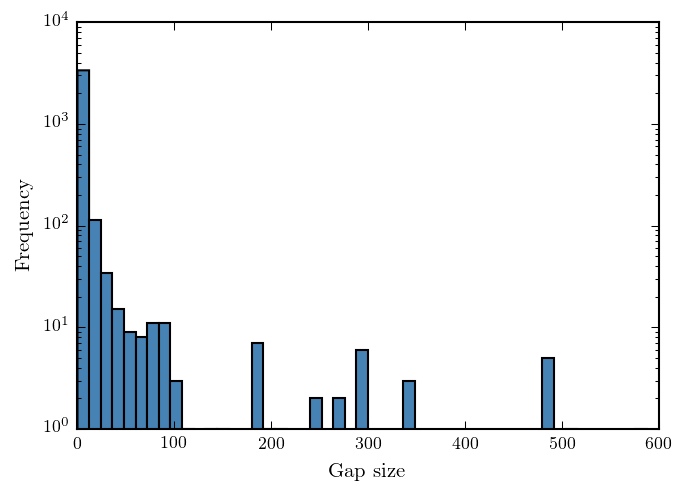

In [8]:
plt.hist(gapSizes, bins=50, range=[0, 600])
plt.yscale("log")
plt.xlabel("Gap size")
plt.ylabel("Frequency")